dimensionality reduction

Mean Vector:
[3.8 4.8]

Covariance Matrix:
[[5.7 5.7]
 [5.7 5.7]]

Eigenvalues:
[11.4  0. ]

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


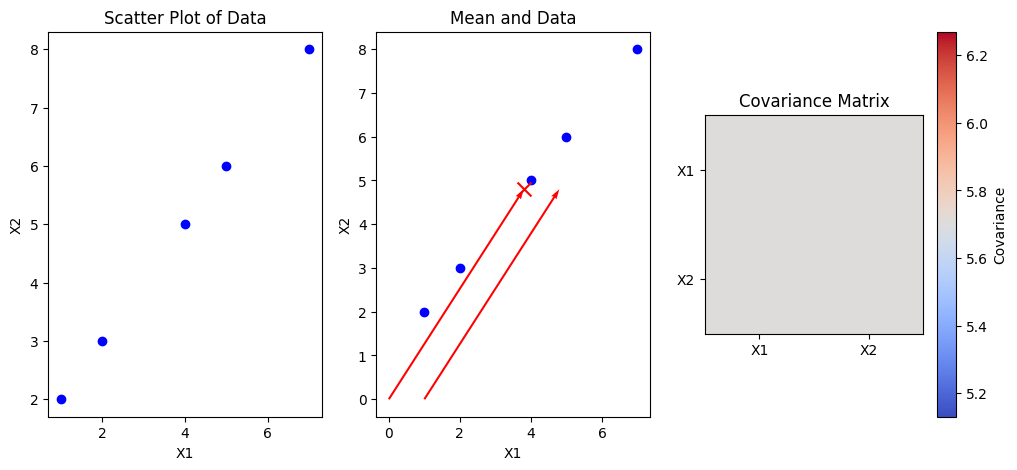

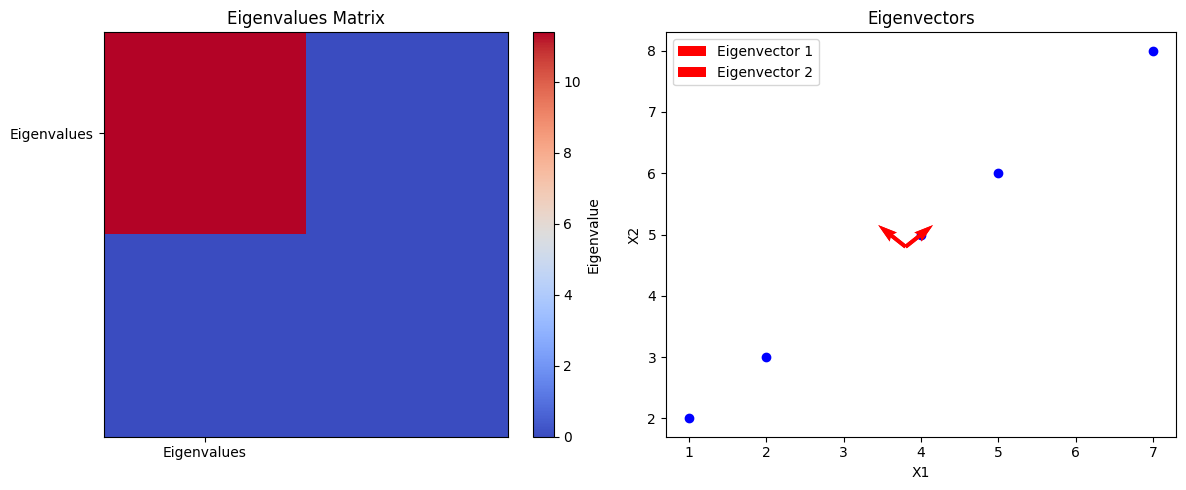

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your own dataset)
data = np.array([[1, 2], [4, 5], [7, 8], [2, 3], [5, 6]])

# Step 1: Compute the mean (average) of the data
mean_vector = np.mean(data, axis=0)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(data, rowvar=False)

# Visualize the mean and covariance matrix
plt.figure(figsize=(12, 5))

# Scatter plot of the data
plt.subplot(131)
plt.scatter(data[:, 0], data[:, 1], c='b', marker='o')
plt.title('Scatter Plot of Data')
plt.xlabel('X1')
plt.ylabel('X2')

# Mean vector
mean_vector_matrix = np.outer(mean_vector, np.ones_like(mean_vector))

# Plot mean vector
plt.subplot(132)
plt.scatter(data[:, 0], data[:, 1], c='b', marker='o')
plt.scatter(mean_vector[0], mean_vector[1], c='r', marker='x', s=100, label='Mean')
plt.quiver(*mean_vector_matrix, angles='xy', scale_units='xy', scale=1, color='r')
plt.title('Mean and Data')
plt.xlabel('X1')
plt.ylabel('X2')

# Plot covariance matrix as a heatmap
plt.subplot(133)
plt.imshow(cov_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix')
plt.xticks([0, 1], ['X1', 'X2'])
plt.yticks([0, 1], ['X1', 'X2'])

# Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Visualize eigenvalues and eigenvectors
plt.figure(figsize=(12, 5))

# Plot eigenvalues as a diagonal matrix
eigenvalues_matrix = np.diag(eigenvalues)

# Print the results
print("Mean Vector:")
print(mean_vector)

print("\nCovariance Matrix:")
print(cov_matrix)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

# Plot eigenvalues matrix
plt.subplot(121)
plt.imshow(eigenvalues_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Eigenvalue')
plt.title('Eigenvalues Matrix')
plt.xticks([0], ['Eigenvalues'])
plt.yticks([0], ['Eigenvalues'])

# Plot eigenvectors matrix
plt.subplot(122)
plt.scatter(data[:, 0], data[:, 1], c='b', marker='o')
for i in range(len(eigenvectors)):
    plt.quiver(*mean_vector_matrix, eigenvectors[0, i], eigenvectors[1, i],
               angles='xy', scale_units='xy', scale=2, color='r', label=f'Eigenvector {i+1}')
plt.title('Eigenvectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.tight_layout()
plt.show()